### Telco Customer Churn Analysis
Athour

MD Abu Bokkor Siddique

Warren , MI | 313-564-9863 | siddique5002@gmail.com | linkedin.com/in/mdsiddque

Data: DEC 02 2024

In [6]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.colors as colors

pio.templates.default = "plotly_white"

In [8]:
df = pd.read_csv("C:/Users/abu_s/Desktop/Data/Customer Churn.csv", encoding='latin1')

In [10]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#Rplaceing blanks with 0 as tenure is 0 and no total chares are recorded 

In [17]:
df ["TotalCharges"] = df ["TotalCharges"].replace(" ","0")
df ["TotalCharges"] = df ["TotalCharges"].astype("float")

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [26]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [30]:
df["customerID"].duplicated().sum()

0

In [24]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [32]:
def conv(value):
    if value ==1:
        return "Yes"
    else:
        return "No"

df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)

In [34]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,No,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,No,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,No,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,No,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,No,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


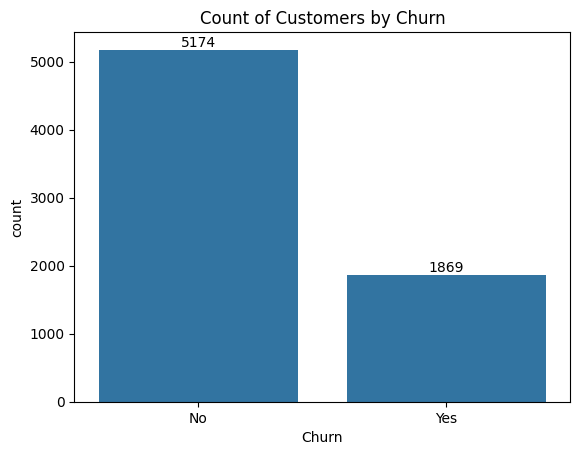

In [62]:
ax = sns.countplot(x='Churn', data=df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Churn")
plt.show()

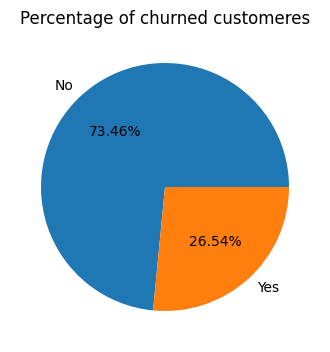

In [60]:
plt.figure(figsize = (4,5))
gb = df.groupby("Churn").agg({'Churn':"count"})

plt.pie(gb['Churn'], labels=gb.index, autopct="%1.2f%%")
plt.title("Percentage of Churned Customeres")

plt.show()

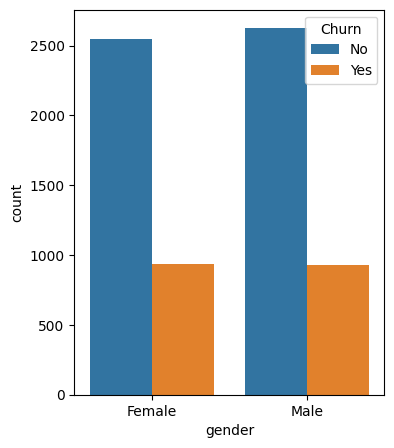

In [83]:
plt.figure(figsize = (4,5))
sns.countplot(x = "gender", data = df, hue = "Churn")
plt.show()

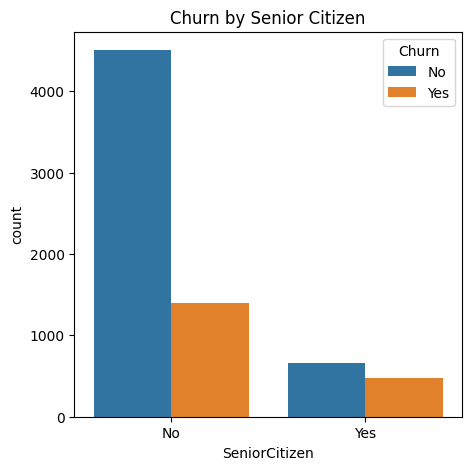

In [81]:
plt.figure(figsize = (5,5))
sns.countplot(x = "SeniorCitizen", data = df, hue = "Churn")
plt.title("Churn by Senior Citizen")
plt.show()

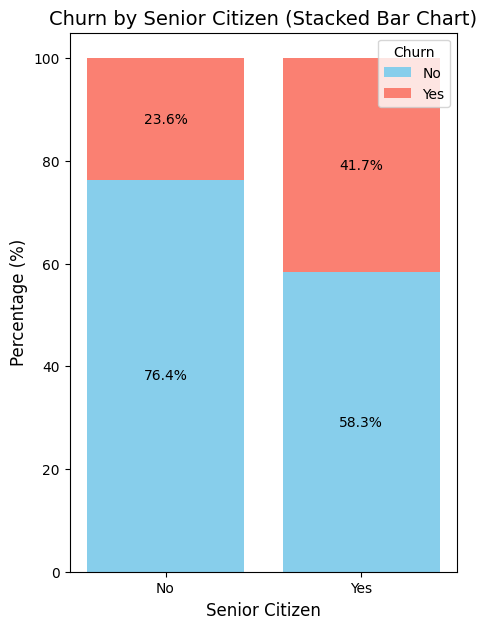

In [95]:
# Assuming `df` is your DataFrame
# Create a crosstab to calculate counts
#cross_tab = pd.crosstab(df['SeniorCitizen'], df['Churn'], normalize='index') * 100

# Create a stacked bar chart
fig, ax = plt.subplots(figsize=(5, 7))

categories = cross_tab.index
churn_yes = cross_tab['Yes']  # Adjust column names based on your data
churn_no = cross_tab['No']

ax.bar(categories, churn_no, label='No', color='skyblue')
ax.bar(categories, churn_yes, bottom=churn_no, label='Yes', color='salmon')

# Add labels
# Add labels with corrected indexing
for i in range(len(categories)):
    ax.text(i, churn_no.iloc[i] / 2, f"{churn_no.iloc[i]:.1f}%", ha='center', va='center', color='black')
    ax.text(i, churn_no.iloc[i] + (churn_yes.iloc[i] / 2), f"{churn_yes.iloc[i]:.1f}%", ha='center', va='center', color='black')
    
# Customize the chart
ax.set_title('Churn by Senior Citizen (Stacked Bar Chart)', fontsize=14)
ax.set_xlabel('Senior Citizen', fontsize=12)
ax.set_ylabel('Percentage (%)', fontsize=12)
ax.legend(title='Churn')
plt.show()

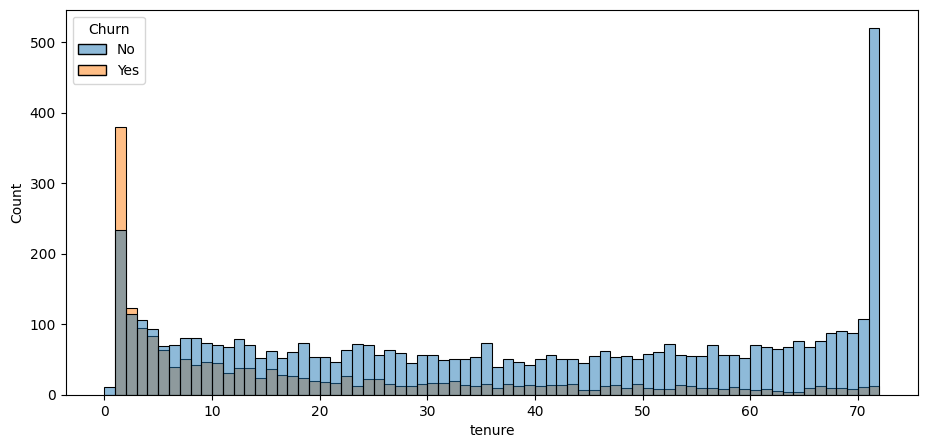

In [119]:
plt.figure(figsize = (11,5))
sns.histplot(x = "tenure", data = df, bins = 72, hue = "Churn")
plt.show()

### People who have used our services for long time have stayed and people who have used our service #1 or 2 month have churned 

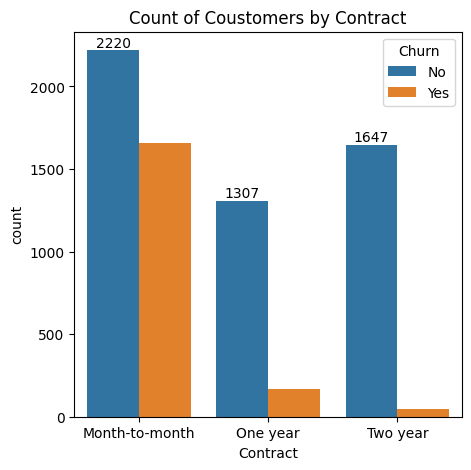

In [130]:
plt.figure(figsize = (5,5))
ax = sns.countplot(x = "Contract", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Coustomers by Contract")
plt.show()

### People Who Have Month to Month Contract are Likely to Churn Then From Those Who Have 1 or 2 Year or Contract 

In [139]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

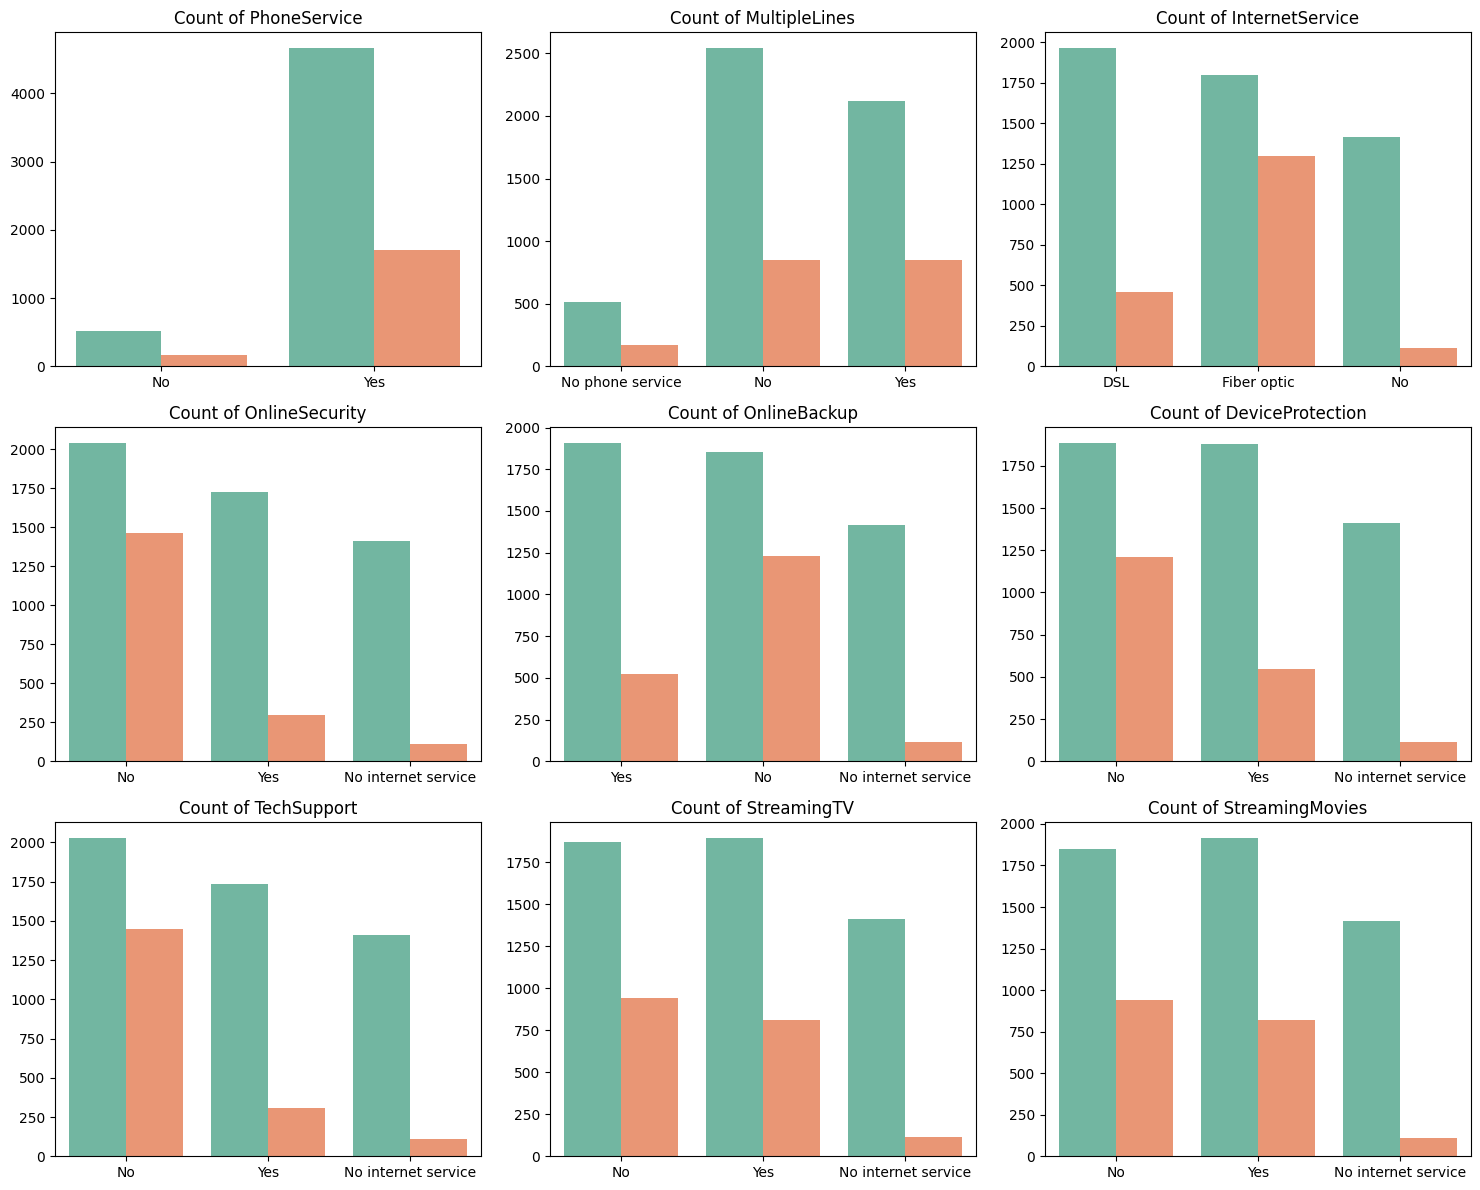

In [153]:
# List of columns you want to plot
columns = ['PhoneService', 'MultipleLines', 'InternetService', 
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
           'TechSupport', 'StreamingTV', 'StreamingMovies']

# Create a grid of subplots (3 rows x 3 columns in this case)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Loop through each column and create a countplot in the corresponding subplot
for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, ax=axes[i], hue= df["Churn"], palette='Set2', legend=False)  # Adding 'hue=col'
    axes[i].set_title(f'Count of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

### The majority of customers who do not churn tend to have essential services such as Phone Service, Internet Service (particularly DSL), and Online Security enabled. This suggests that these services may contribute to customer satisfaction and retention.

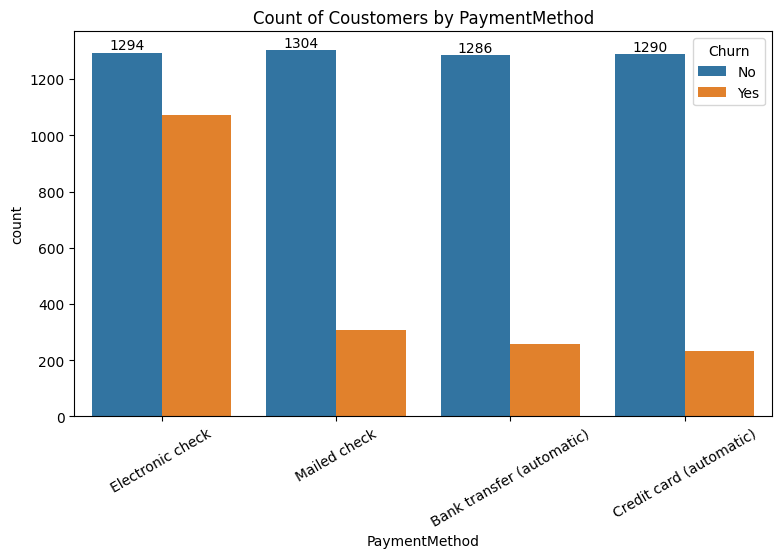

In [168]:
plt.figure(figsize = (9,5))
ax = sns.countplot(x = "PaymentMethod", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Coustomers by PaymentMethod")
plt.xticks(rotation = 30)
plt.show()

### Customer is Likely to Churn When He is Using Electronic Check as a Payment Method